## Problem Statement:

Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.

### Dataset Details: 

The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.

 1: Phishing

 0: Suspicious

 1: Legitimate

The sample could be either legitimate or phishing.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
# Import the dataset
df =  pd.read_csv("dataset.csv")

# Print the dataset
df

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [3]:
# Getting basic info of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [4]:
#checking for null values
df.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [5]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Unique elemnts : having_IPhaving_IP_Address
[-1  1]
Number of unique elements : 2


Unique elemnts : URLURL_Length
[ 1  0 -1]
Number of unique elements : 3


Unique elemnts : Shortining_Service
[ 1 -1]
Number of unique elements : 2


Unique elemnts : having_At_Symbol
[ 1 -1]
Number of unique elements : 2


Unique elemnts : double_slash_redirecting
[-1  1]
Number of unique elements : 2


Unique elemnts : Prefix_Suffix
[-1  1]
Number of unique elements : 2


Unique elemnts : having_Sub_Domain
[-1  0  1]
Number of unique elements : 3


Unique elemnts : SSLfinal_State
[-1  1  0]
Number of unique elements : 3


Unique elemnts : Domain_registeration_length
[-1  1]
Number of unique elements : 2


Unique elemnts : Favicon
[ 1 -1]
Number of unique elements : 2


Unique elemnts : port
[ 1 -1]
Number of unique elements : 2


Unique elemnts : HTTPS_token
[-1  1]
Number of unique elements : 2


Unique elemnts : Request_URL
[ 1 -1]
Number of unique elements : 2


Unique elemnts : URL_of_Anchor
[-1  

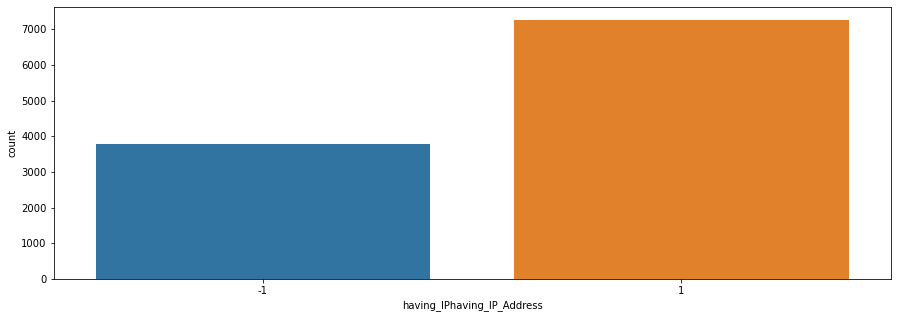

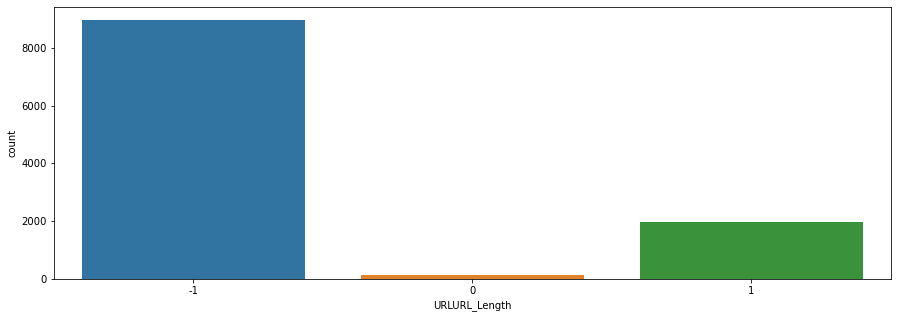

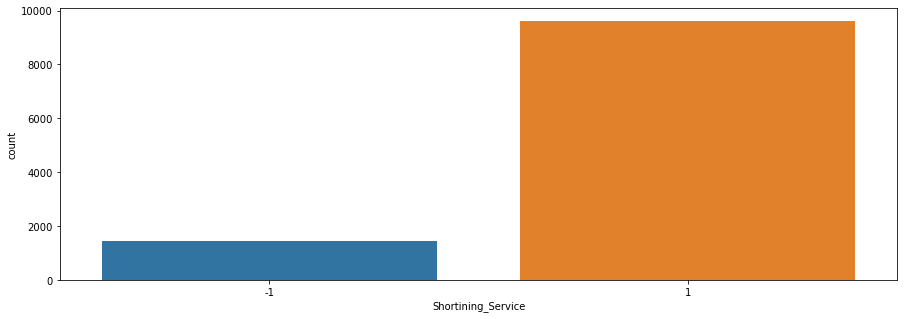

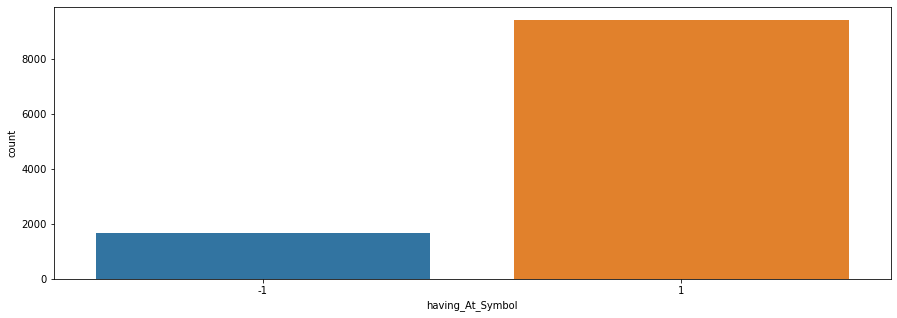

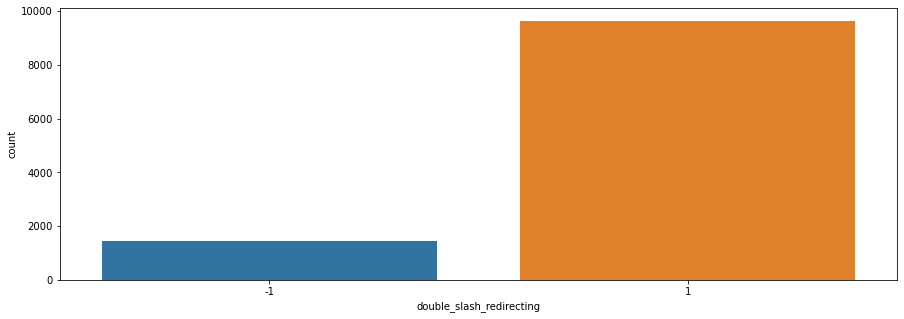

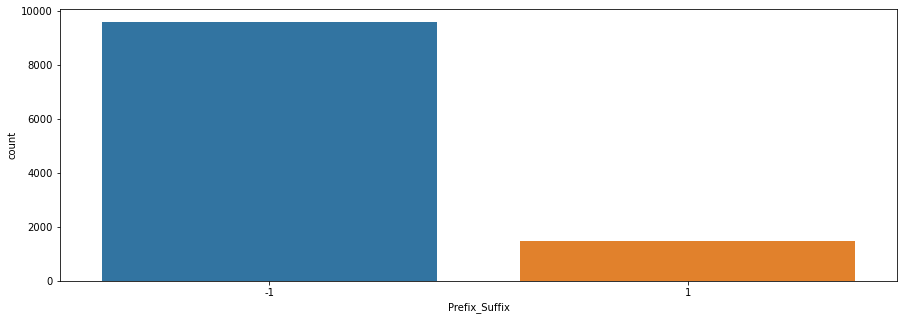

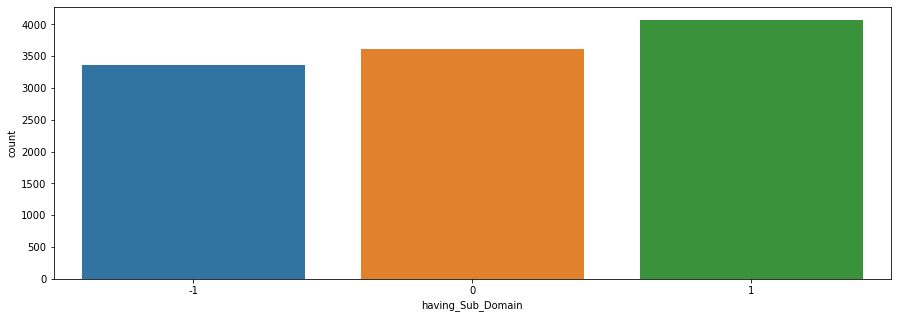

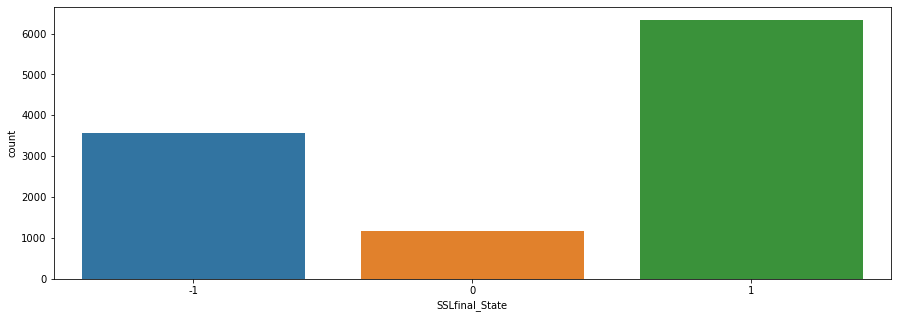

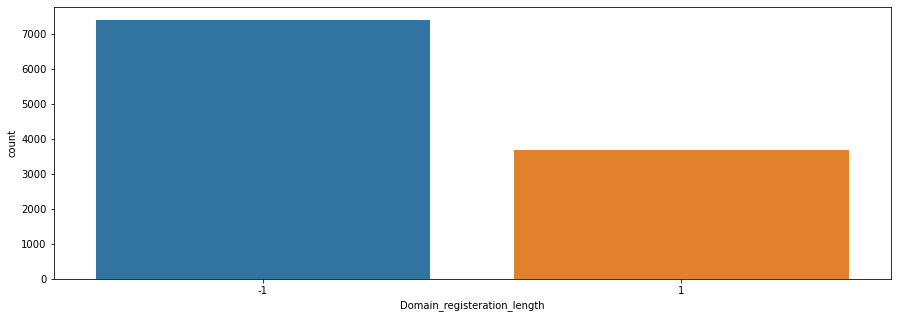

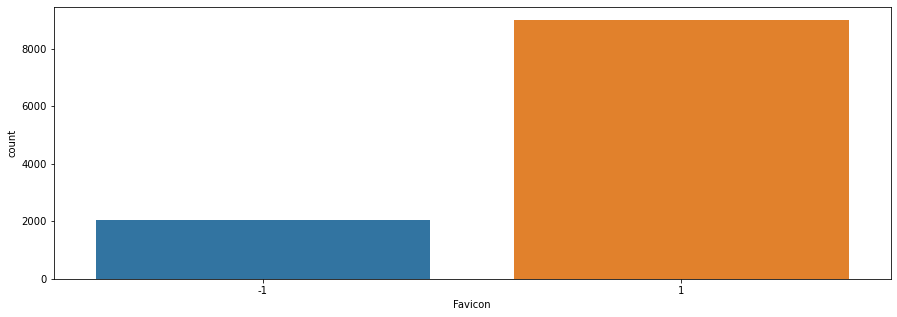

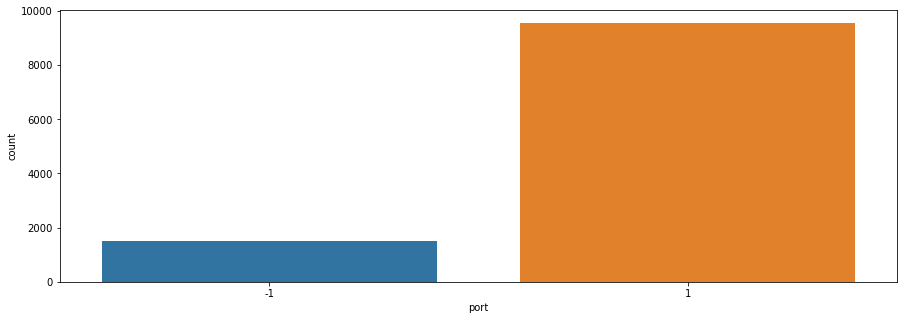

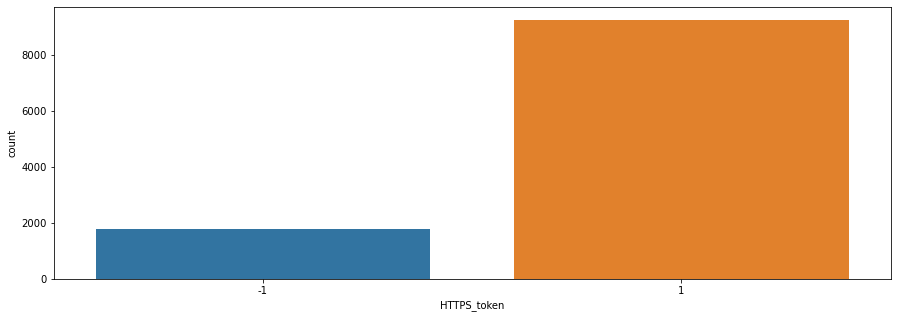

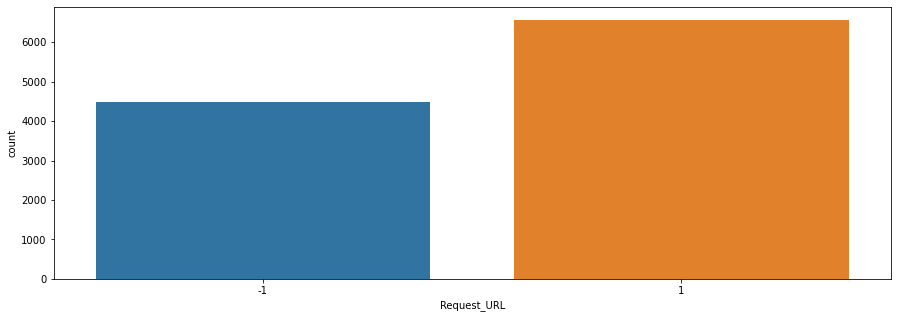

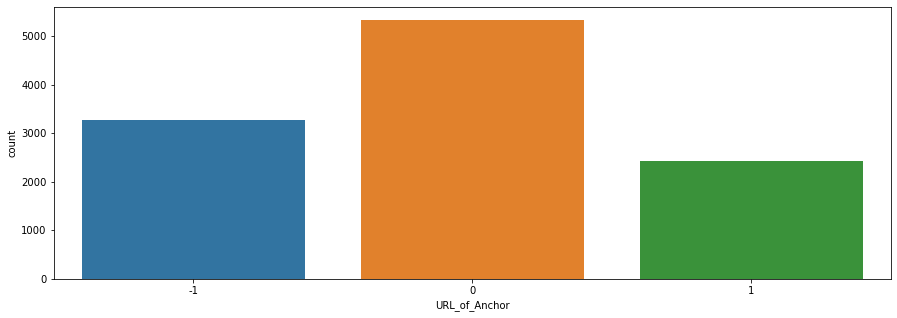

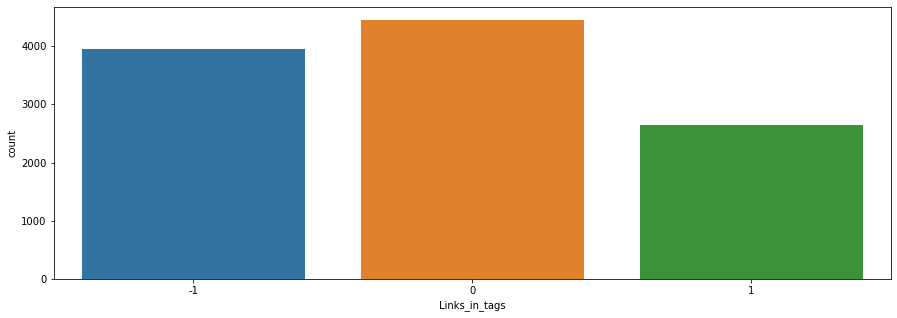

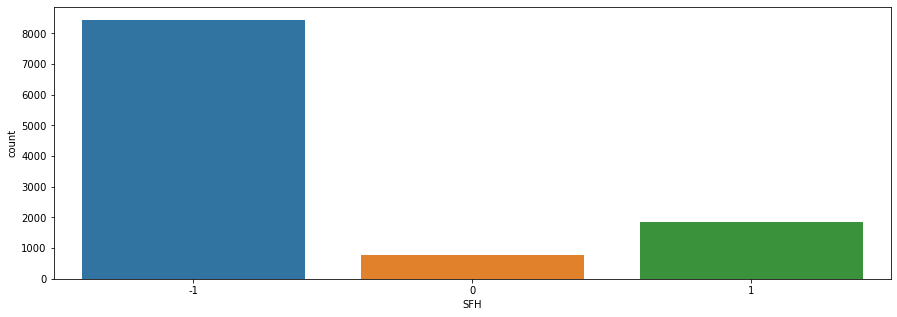

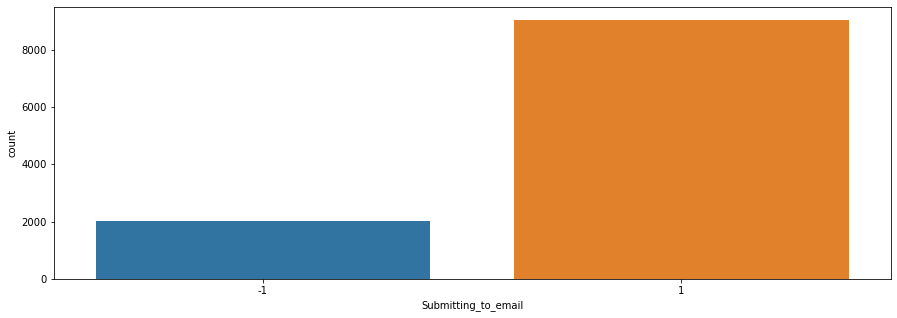

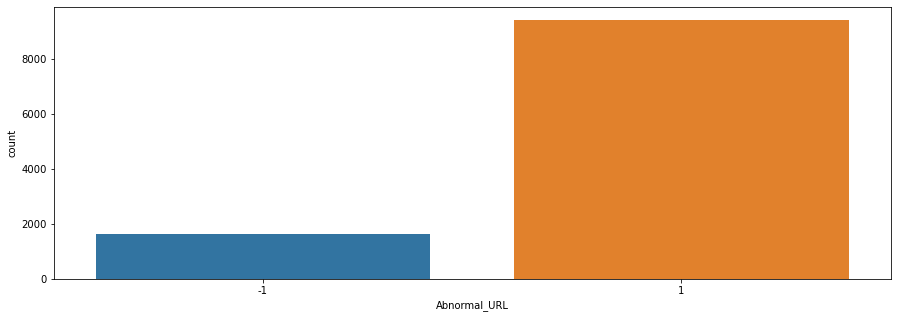

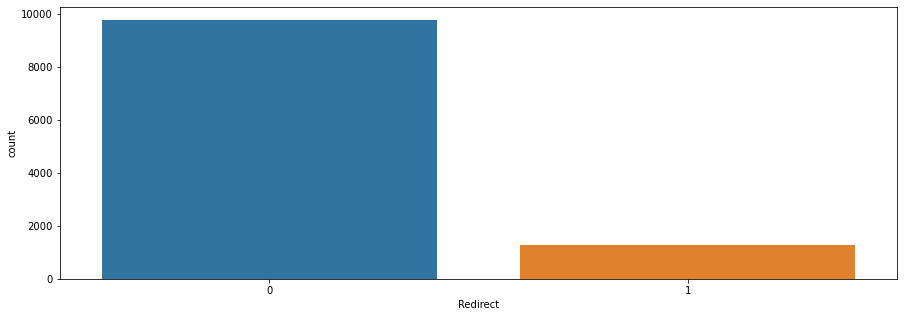

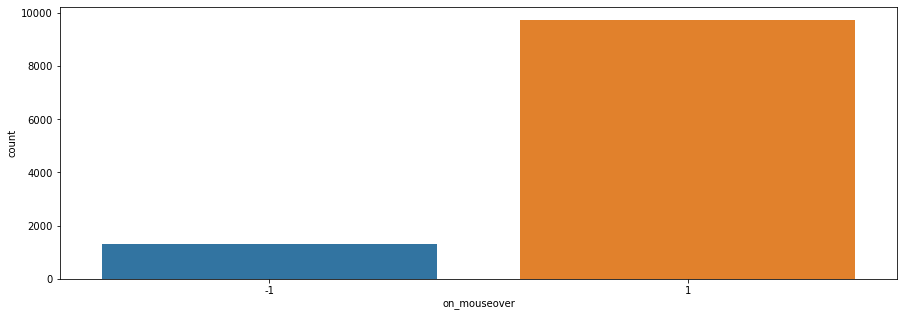

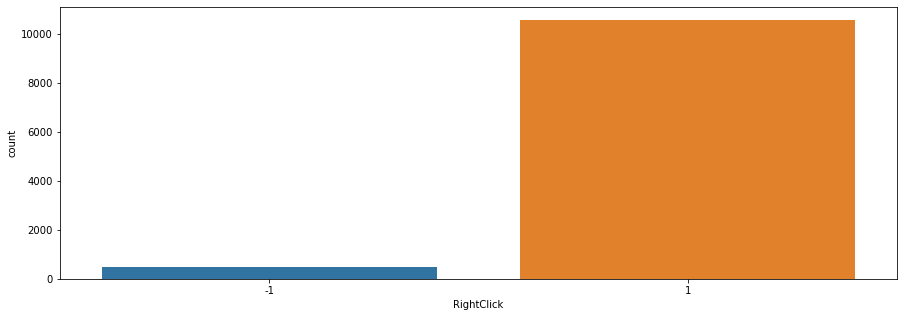

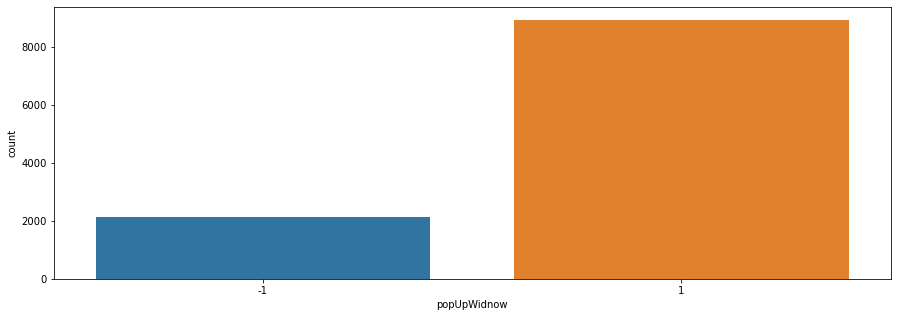

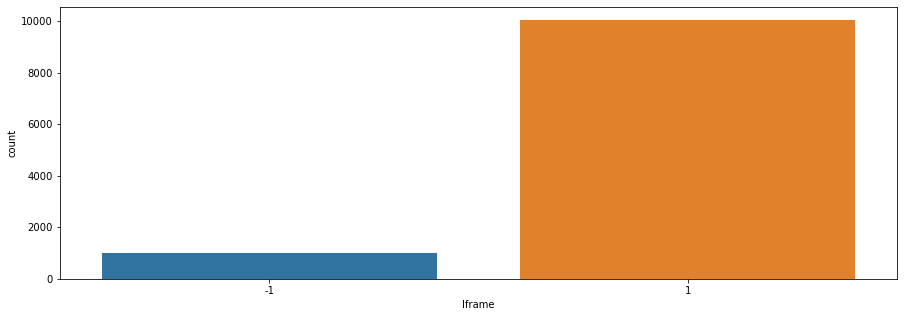

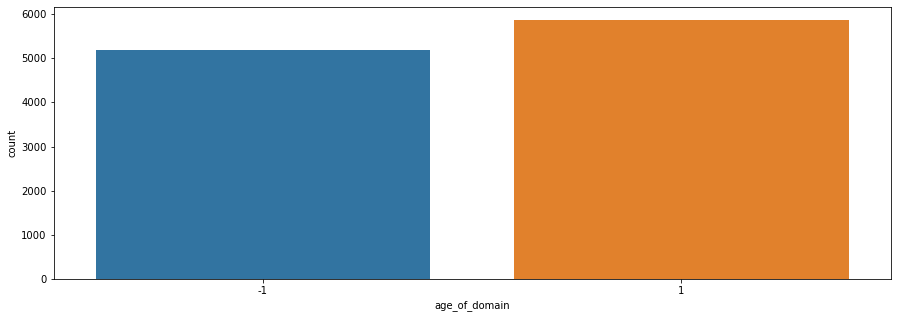

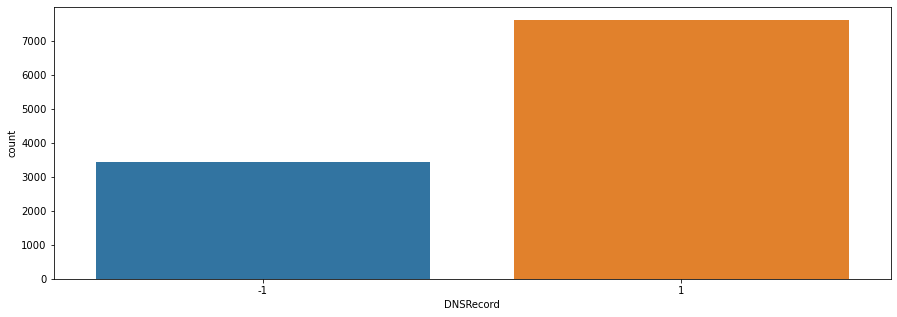

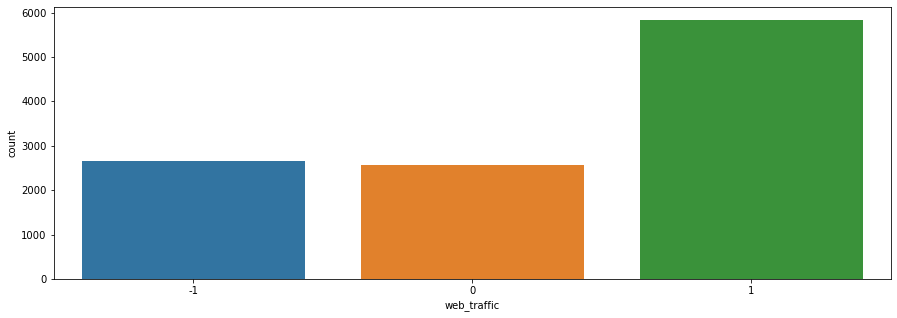

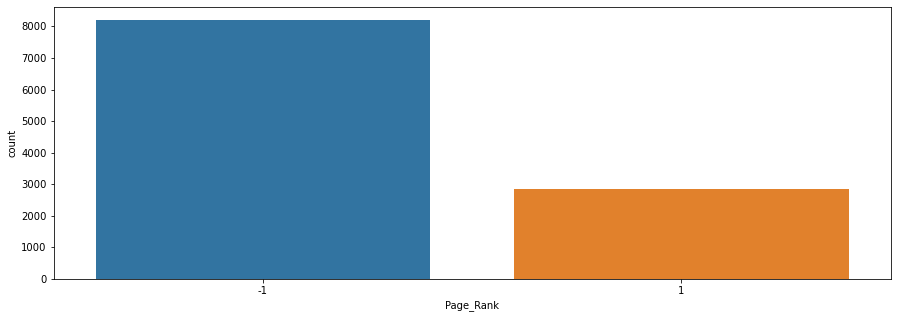

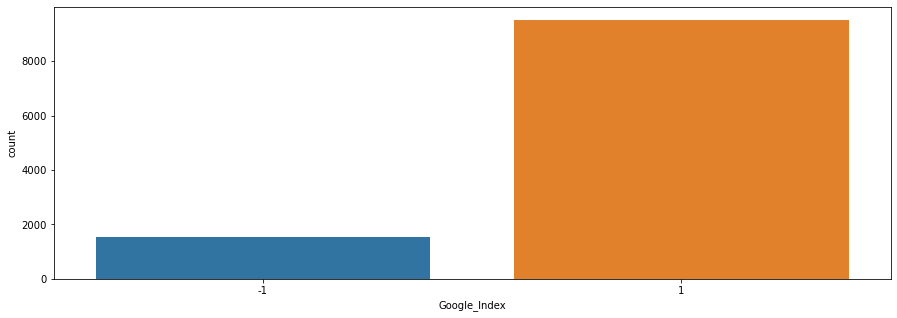

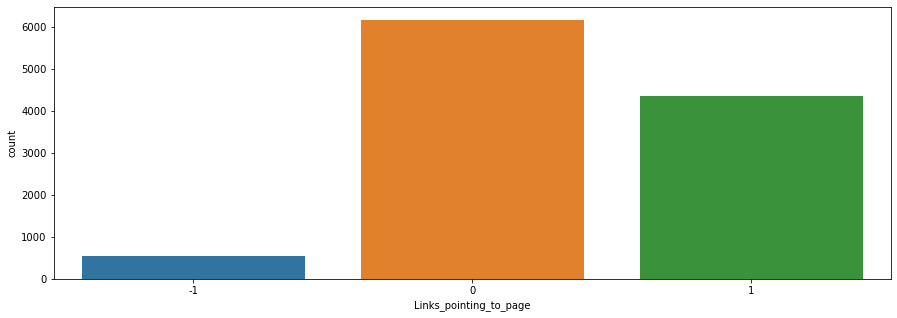

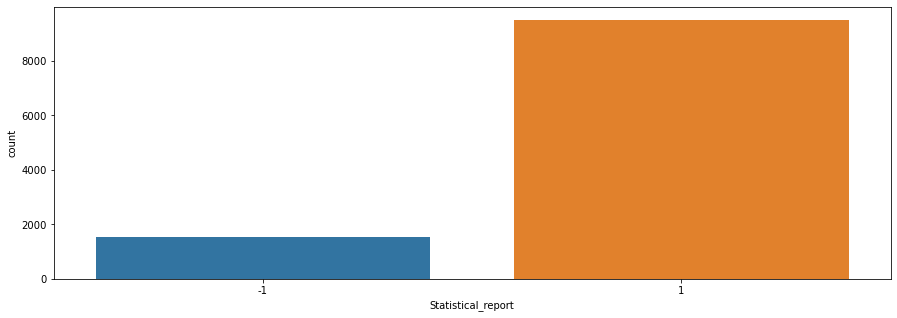

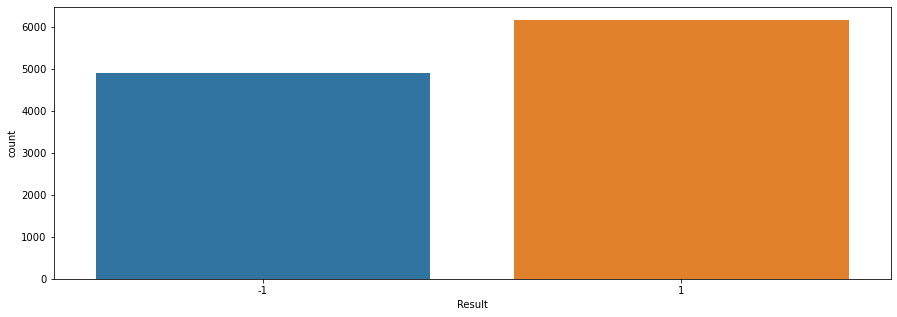

In [6]:
# Finding uniqie elements and visualizing their counts in each feature
for i in range(1,len(df.columns)):
    print("Unique elemnts :",df.columns[i])
    print(df[df.columns[i]].unique())
    print("Number of unique elements :",len(df[df.columns[i]].unique()))
    print("\n")
    plt.figure(figsize=(15,5))
    sns.countplot(x=df.columns[i],data=df)

<AxesSubplot:>

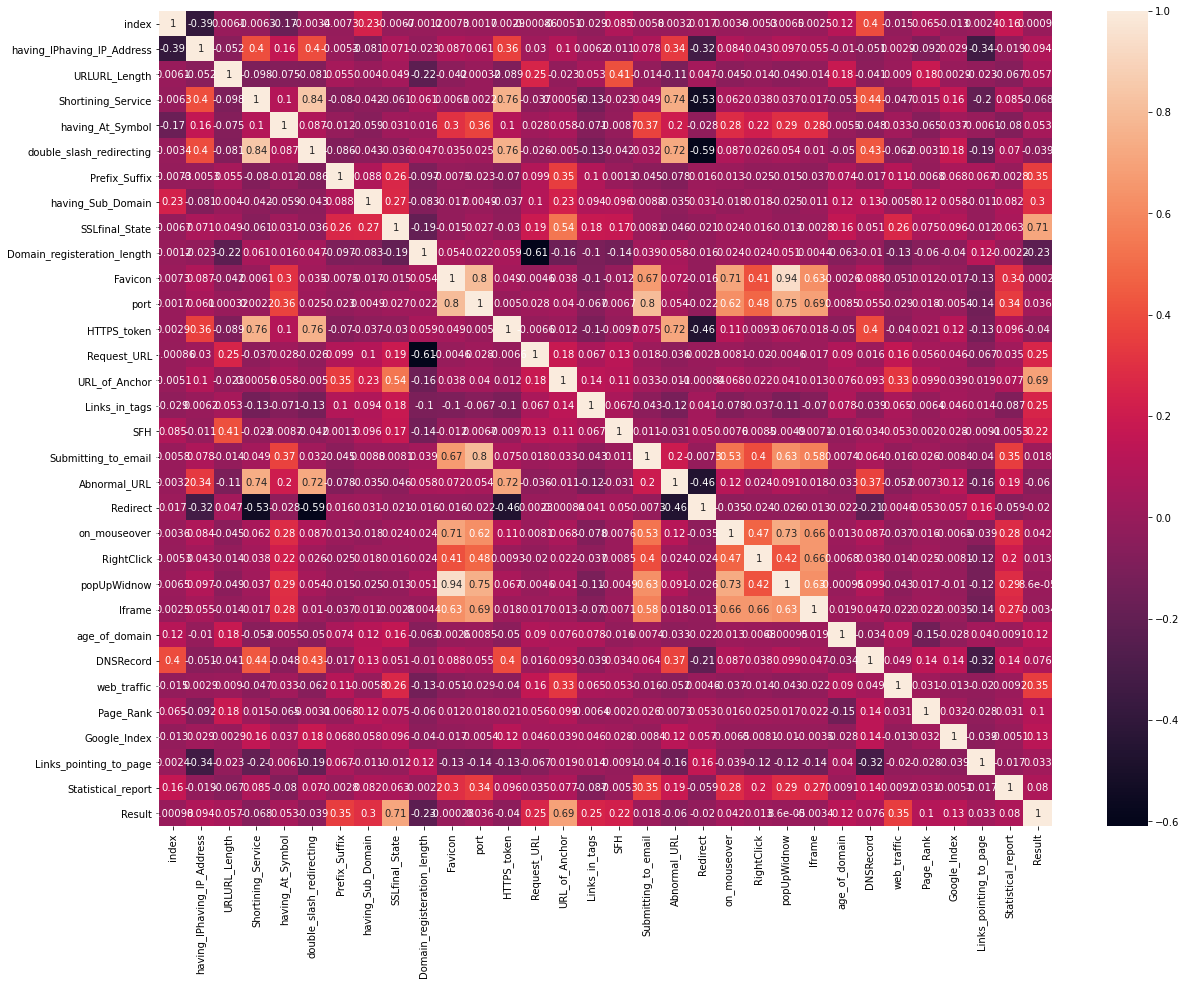

In [7]:
# Heatmap of the correlation between variables are displayed
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [8]:
# unction to find the correlated features based on user specified limit
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [9]:
# Find correlated variables with more than the specified threshold of '0.7'
corrFilter(df, 0.7)

on_mouseover              Favicon                     0.706179
Result                    SSLfinal_State              0.714741
Abnormal_URL              HTTPS_token                 0.716287
double_slash_redirecting  Abnormal_URL                0.723724
on_mouseover              popUpWidnow                 0.733629
Shortining_Service        Abnormal_URL                0.739290
popUpWidnow               port                        0.748517
Shortining_Service        HTTPS_token                 0.757838
HTTPS_token               double_slash_redirecting    0.760799
port                      Submitting_to_email         0.799088
                          Favicon                     0.803834
double_slash_redirecting  Shortining_Service          0.842796
Favicon                   popUpWidnow                 0.939633
index                     index                            NaN
dtype: float64

In [10]:
# Find correlated variables with more than the specified threshold of '0.8'
corrFilter(df, 0.8)

Favicon             port                        0.803834
Shortining_Service  double_slash_redirecting    0.842796
Favicon             popUpWidnow                 0.939633
index               index                            NaN
dtype: float64

In [11]:
# Remove index from the data set and save to a new copy
df1 = df.copy(deep=True)

# Droping Index column
df1= df1.drop(['index'], axis=1)

# Print and check the data
df1

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [12]:
# Extracting the feature columns
X = df1.drop(['Result'], axis=1)

# Print and check
X

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


In [13]:
# Extracting the target column
Y = df1[['Result']]

# Print and check
Y

,Result
0,-1
1,-1
2,-1
3,-1
4,1
...,...
11050,1
11051,-1
11052,-1
11053,-1


In [14]:
# Import the library for spliting data into training and testing set
from sklearn.model_selection import train_test_split

In [15]:
# Import the required model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [16]:
# Libraries for deep learning model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [17]:
# Libraries for cross-validation and evaluation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Importing the statistics module
from statistics import mean

In [18]:
# Listing the base model algorithms
base_algos = [LogisticRegression(),
              RidgeClassifier(),
              PassiveAggressiveClassifier(),
              GaussianNB(),
              SGDClassifier(),
              KNeighborsClassifier(),
              DecisionTreeClassifier(),
              ExtraTreeClassifier(),
              GradientBoostingClassifier(),
              LinearDiscriminantAnalysis(),
              QuadraticDiscriminantAnalysis(),
              LinearSVC(),
              SVC(),
              AdaBoostClassifier(),
              BaggingClassifier(),
              RandomForestClassifier(),
              XGBClassifier(),
              'ANN Model']

# Listing the names of the base model algorithms
model_names = ['Logistic Regression',
               'Ridge Classifier',
               'Passive Aggressive Classifier',
               'Naive Bayes',
               'SGD Classifier',
               'KNN',
               'Decision Tree',
               'Extra Tree Classifier',
               'Gradient Boosting Classifier',
               'Linear Discriminant Analysis',
               'Quadratic Discriminant Analysis',
               'Linear Support Vector Classifier',
               'Support Vector Machine',
               'Ada Boost Classifier',
               'Bagging Classifier',
               'Random Forest',
               'XGBoost Classifier',
               'ANN Model']

In [19]:
# Function to Building Deep learning (ANN) model
def build_ANN(ip_size):
    
    # initializing the model
    model = Sequential()
    
    # Layers
    model.add(Dense(units=128,activation='relu',kernel_initializer='uniform', input_dim = ip_size))
    model.add(Dropout(0.2))
    model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    
    # Return ANN model
    return model

In [20]:
def compare_models(X, Y, del_col_lst, base_algos, model_names, cv):
    
    # Remove the specified columns
    X = X.drop(del_col_lst, axis=1)
    
    # Convert to array
    X = np.array(X)

    # Convert to array
    Y = np.array(Y)
    
    # Splitting train and test
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100, stratify=Y)
    
    # Initializing empty list to store the model metrics
    cv_score = []
    test_accuracy = []
    test_precision_Phishing = []
    test_recall_Phishing = []
    f1_score_Phishing = []
    test_precision_legit = []
    test_recall_legit = []
    f1_score_legit = []
    
    print("START...")
    
    # Iterating over base algorithms
    for algo in base_algos:
        
        print("Running : ", algo)
        
        # Initializing model
        model = algo
        
        # Training model
        if model == 'ANN Model':

            # Wrap Keras model so it can be used by scikit-learn
            model = KerasClassifier(build_fn=build_ANN,
                                    ip_size = x_train.shape[1],
                                    epochs=15, 
                                    batch_size=100, 
                                    verbose=0)
            
            # Evaluate neural network using three-fold cross-validation
            scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv)
            mean_score =  mean(scores)
            
            # Saving the training cv score
            cv_score.append(mean_score)
            
            # Fitting the training model
            model.fit(x_train, y_train)

        else:

            # Performing cross validation on the model
            scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1) 
            mean_score =  mean(scores)
            
            # Saving the training cv score
            cv_score.append(mean_score)
            
            # Fitting the training model
            model.fit(x_train, y_train)
        
        # Make predictions from the built model
        predictions = model.predict(x_test)
        
        # Getting test accuracy
        test_accuracy.append(accuracy_score(y_test, predictions))
            
        # Get phishing precision
        test_precision_Phishing.append(precision_score(y_test, predictions, average=None)[0])

        # Getting phishing recall
        test_recall_Phishing.append(recall_score(y_test, predictions, average=None)[0])
            
        # Getting phishing f1 Score
        f1_score_Phishing.append(f1_score(y_test, predictions, average=None)[0])
            
        # Getting test precision
        test_precision_legit.append(precision_score(y_test, predictions, average=None)[0])
        
        # Getting test recall
        test_recall_legit.append(recall_score(y_test, predictions, average=None)[0])
        
        # Getting test f1 Score
        f1_score_legit.append(f1_score(y_test, predictions, average=None)[0])
        
    # Creating a dataframe for model metrics
    df_eval = pd.DataFrame({'Model': model_names,
                            'CV Score': cv_score,
                            'Test Accuracy': test_accuracy,
                            "Test Precision (Phishing)": test_precision_Phishing,
                            "Test Recall (Phishing)": test_recall_Phishing,
                            "Test F1 Score (Phishing)": f1_score_Phishing,
                            "Test Precision (legit)": test_precision_legit,
                            "Test Recall (legit)": test_recall_legit,
                            "Test F1 Score (legit)": f1_score_legit})
    
    # Return the model metrics
    return df_eval

In [21]:
# Define K-Fold validation object
cv = KFold(n_splits=10, shuffle=False)

In [22]:
# Defining list of highly correlated columns to be removed
del_col_lst = ['Favicon', 'Shortining_Service']

In [23]:
# Perform model comparison
df_eval = compare_models(X, Y, del_col_lst, base_algos, model_names, cv)

# Print and check
df_eval

START...
Running :  LogisticRegression()
Running :  RidgeClassifier()
Running :  PassiveAggressiveClassifier()
Running :  GaussianNB()
Running :  SGDClassifier()
Running :  KNeighborsClassifier()
Running :  DecisionTreeClassifier()
Running :  ExtraTreeClassifier()
Running :  GradientBoostingClassifier()
Running :  LinearDiscriminantAnalysis()
Running :  QuadraticDiscriminantAnalysis()
Running :  LinearSVC()
Running :  SVC()
Running :  AdaBoostClassifier()
Running :  BaggingClassifier()
Running :  RandomForestClassifier()
Running :  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_paral

,Model,CV Score,Test Accuracy,Test Precision (Phishing),Test Recall (Phishing),Test F1 Score (Phishing),Test Precision (legit),Test Recall (legit),Test F1 Score (legit)
0,Logistic Regression,0.928199,0.924016,0.926471,0.900000,0.913043,0.926471,0.900000,0.913043
1,Ridge Classifier,0.921640,0.917232,0.928956,0.880612,0.904138,0.928956,0.880612,0.904138
2,Passive Aggressive Classifier,0.890885,0.908186,0.942987,0.843878,0.890684,0.942987,0.843878,0.890684
3,Naive Bayes,0.603455,0.601085,0.526344,0.998980,0.689437,0.526344,0.998980,0.689437
4,SGD Classifier,0.919944,0.918137,0.934712,0.876531,0.904687,0.934712,0.876531,0.904687
5,KNN,0.941993,0.933514,0.923703,0.926531,0.925115,0.923703,0.926531,0.925115
6,Decision Tree,0.961781,0.965174,0.954683,0.967347,0.960973,0.954683,0.967347,0.960973
7,Extra Tree Classifier,0.957144,0.952962,0.946029,0.947959,0.946993,0.946029,0.947959,0.946993
8,Gradient Boosting Classifier,0.948549,0.949344,0.951143,0.933673,0.942327,0.951143,0.933673,0.942327
9,Linear Discriminant Analysis,0.921527,0.917232,0.928956,0.880612,0.904138,0.928956,0.880612,0.904138


### Models selected for furthur study
    1. Quadratic Discriminant Analysis
    2. Bagging Classifier
    3. Random Forest Classifier
    4. XGBoost Classifier

In [24]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from matplotlib.pyplot import figure

In [25]:
# Defining list of highly correlated columns to be removed
del_col_lst = ['Favicon', 'Shortining_Service']

In [26]:
# Remove the specified columns
X = X.drop(del_col_lst, axis=1)
    
# Convert to array
X = np.array(X)

# Convert to array
Y = np.array(Y)
    
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100, stratify=Y)

In [27]:
# Defining a list with classification classess
class_labels = [-1, 1]

In [28]:
# Defining a function to print the report for the model on given data
def get_report(x, y, class_labels, model):
    
    # Fitting the training model
    model.fit(x, y)
    
    # Make predictions from the built model
    predictions = model.predict(x)

    # Printing the classification report for training
    print(classification_report(y, predictions))

    # Getting the confusion matrix for trainng
    cm = confusion_matrix(y, predictions)

    # Plotting the confusion matrix for training
    plot_confusion_matrix(cm, figsize=(12,12), class_names=class_labels)
    
    # Ploting the ROC and AUC of the model
    figure(figsize=(10, 10), dpi=80)
    fpr, tpr, thresholds = roc_curve(y, predictions)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label='AUC (area = %0.2f)' %auc(fpr, tpr))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('ROC curve')
    plt.legend(loc="lower right", facecolor  = "white")
    plt.show()

In [29]:
# The models to be checked in detail
check_models = [
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
]

####################################################################################################

Model name: QuadraticDiscriminantAnalysis()

####################
TRAINING REPORT
####################
              precision    recall  f1-score   support

          -1       0.51      1.00      0.68      3918
           1       1.00      0.24      0.38      4926

    accuracy                           0.57      8844
   macro avg       0.76      0.62      0.53      8844
weighted avg       0.78      0.57      0.51      8844



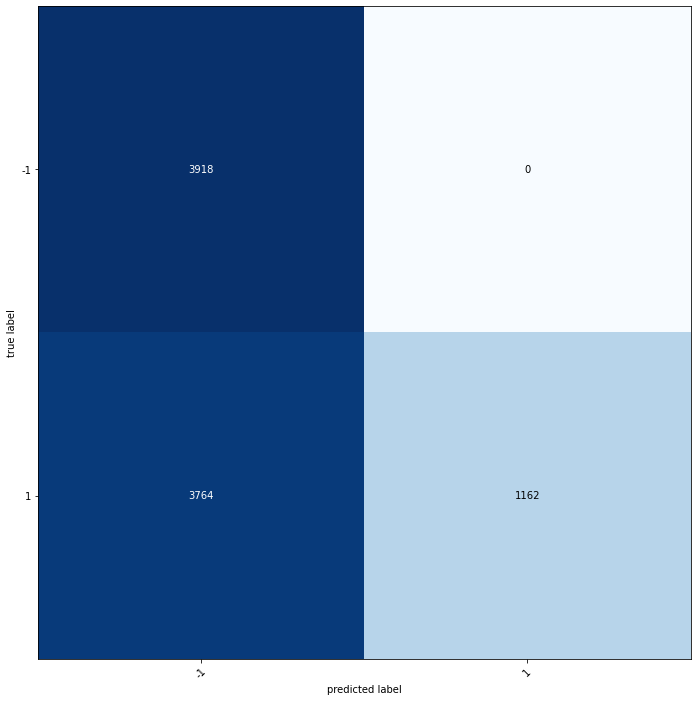

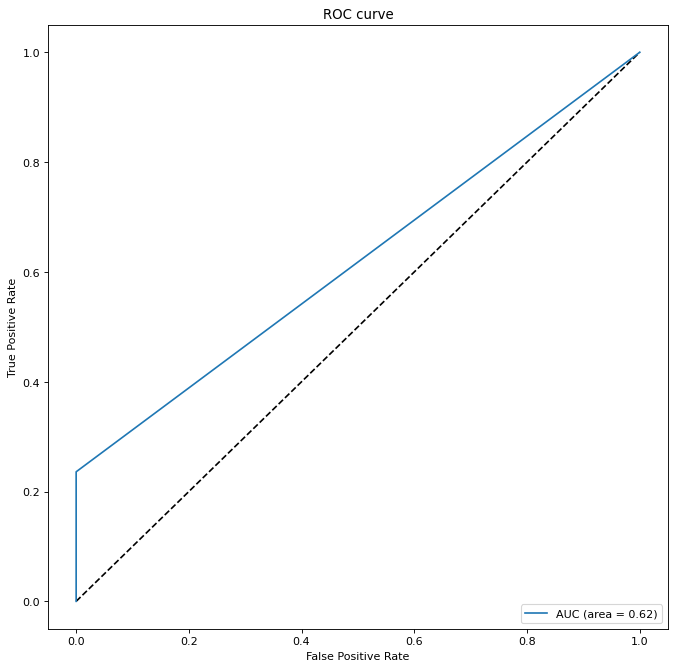

####################
TESTING REPORT
####################
              precision    recall  f1-score   support

          -1       0.51      1.00      0.68       980
           1       1.00      0.25      0.40      1231

    accuracy                           0.58      2211
   macro avg       0.76      0.62      0.54      2211
weighted avg       0.78      0.58      0.52      2211



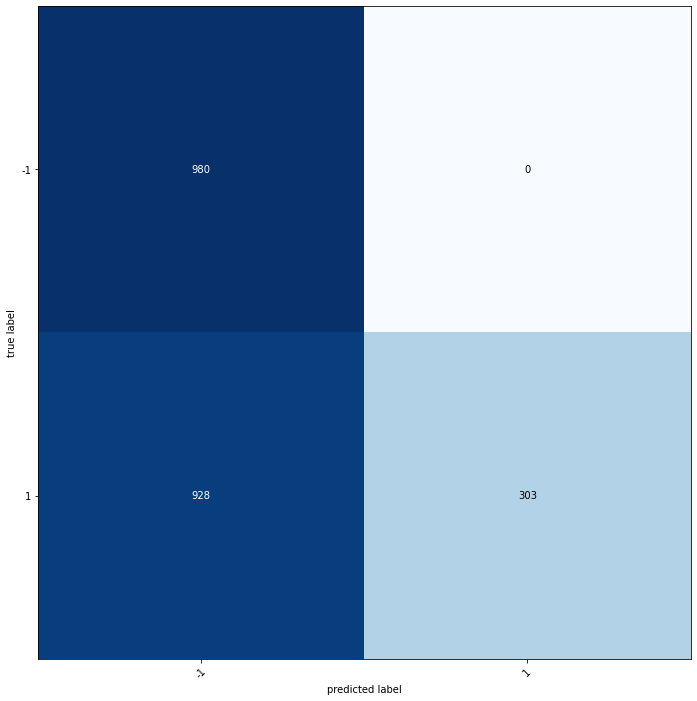

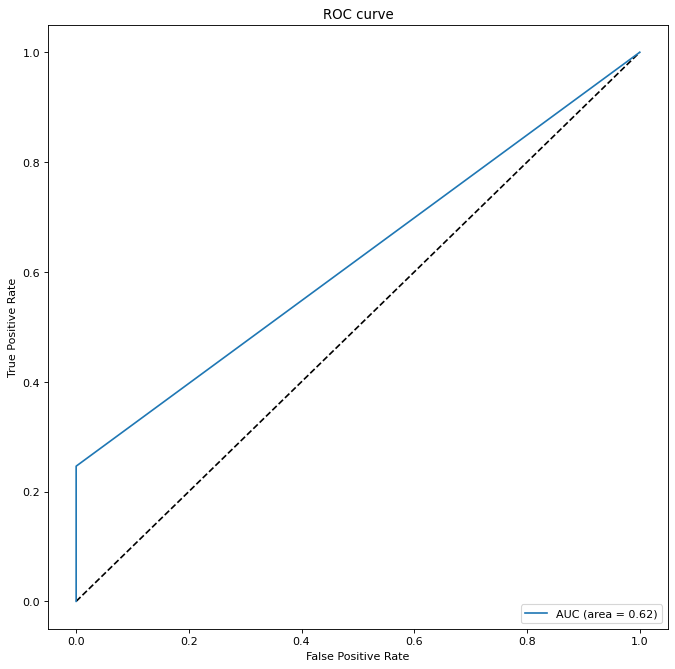

####################################################################################################
####################################################################################################

Model name: BaggingClassifier()

####################
TRAINING REPORT
####################
              precision    recall  f1-score   support

          -1       0.99      0.98      0.99      3918
           1       0.99      0.99      0.99      4926

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844



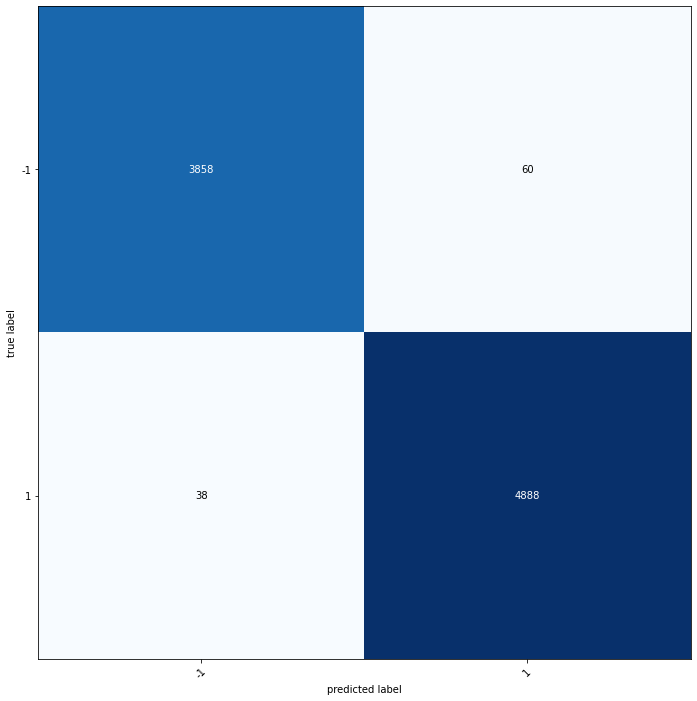

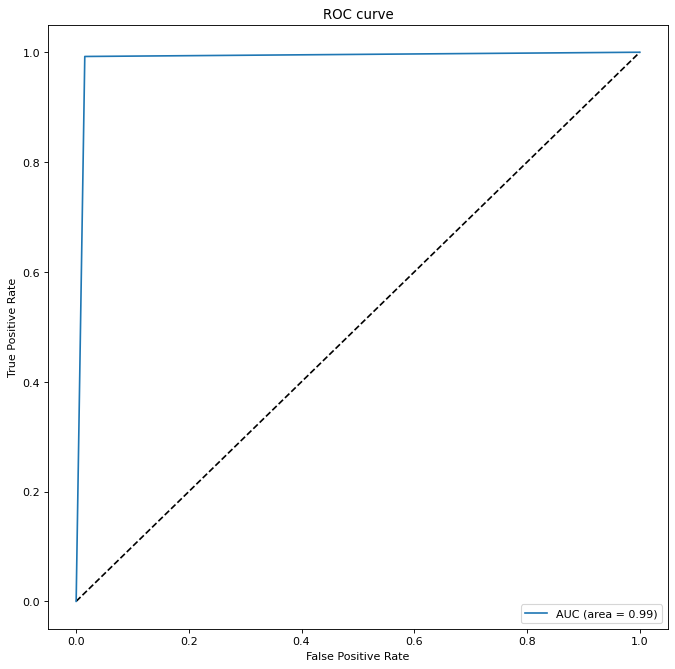

####################
TESTING REPORT
####################
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1231

    accuracy                           0.99      2211
   macro avg       0.99      0.99      0.99      2211
weighted avg       0.99      0.99      0.99      2211



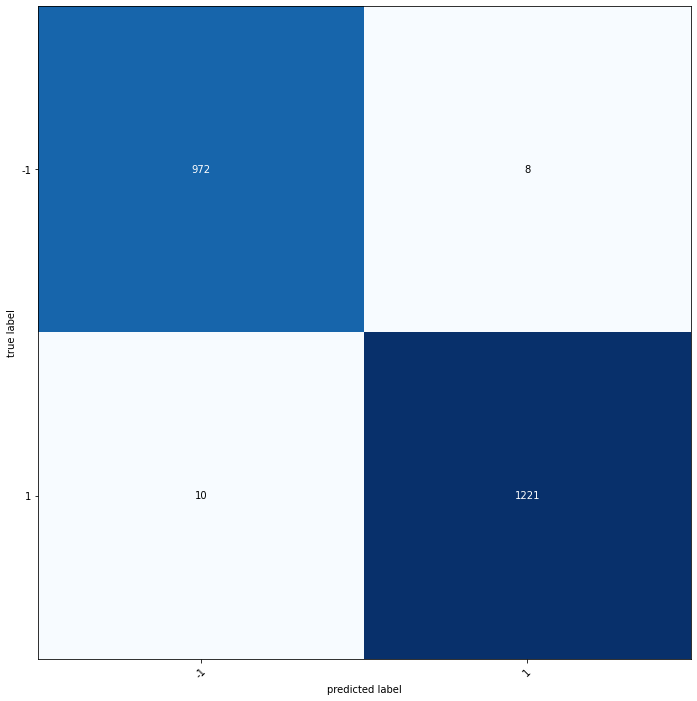

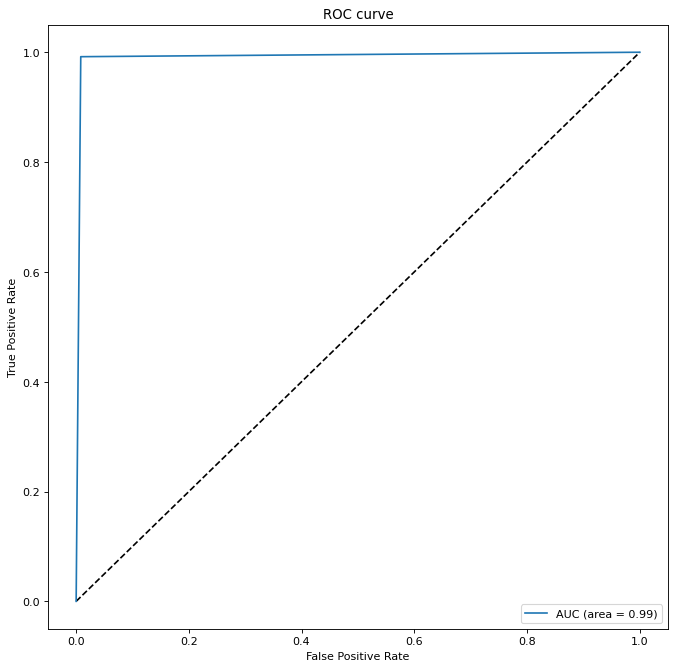

####################################################################################################
####################################################################################################

Model name: RandomForestClassifier()

####################
TRAINING REPORT
####################
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3918
           1       0.99      0.99      0.99      4926

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844



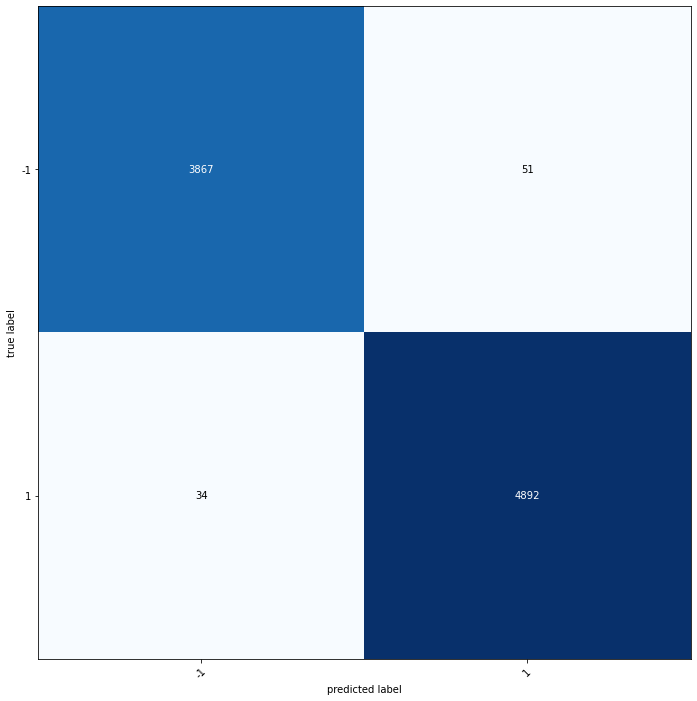

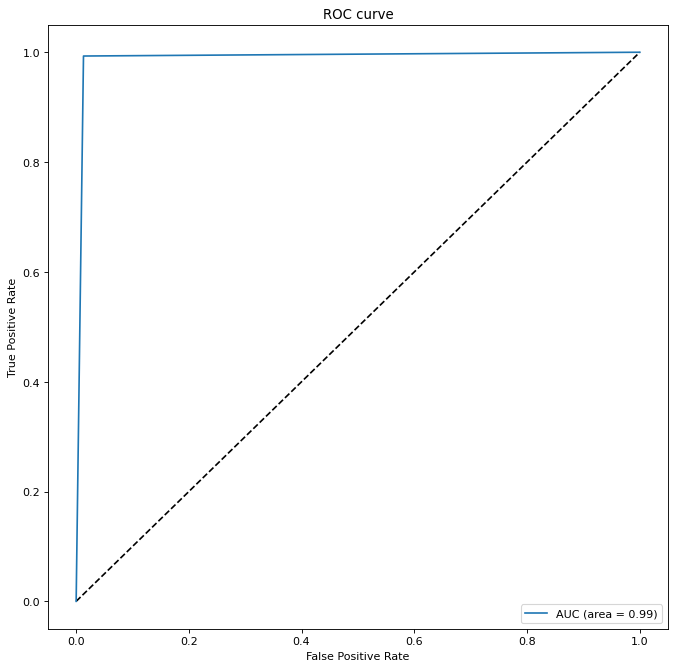

####################
TESTING REPORT
####################
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1231

    accuracy                           0.99      2211
   macro avg       0.99      0.99      0.99      2211
weighted avg       0.99      0.99      0.99      2211



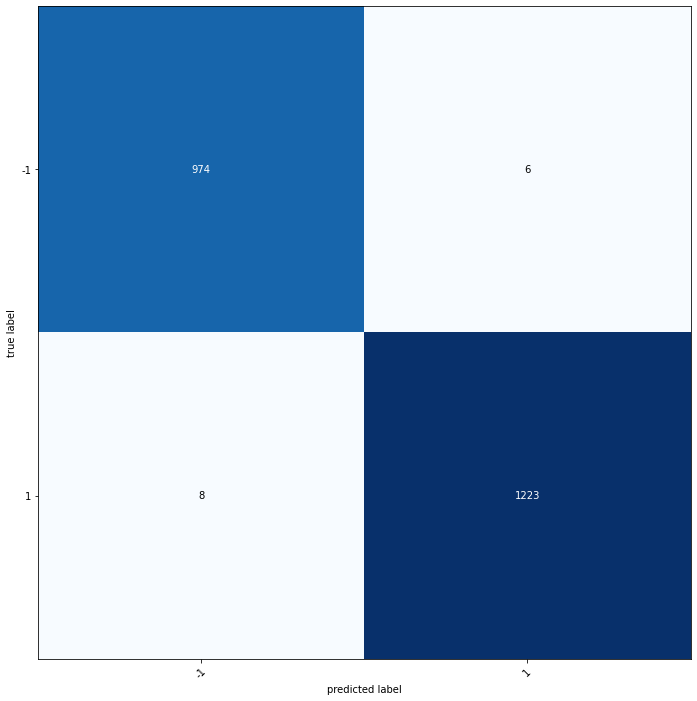

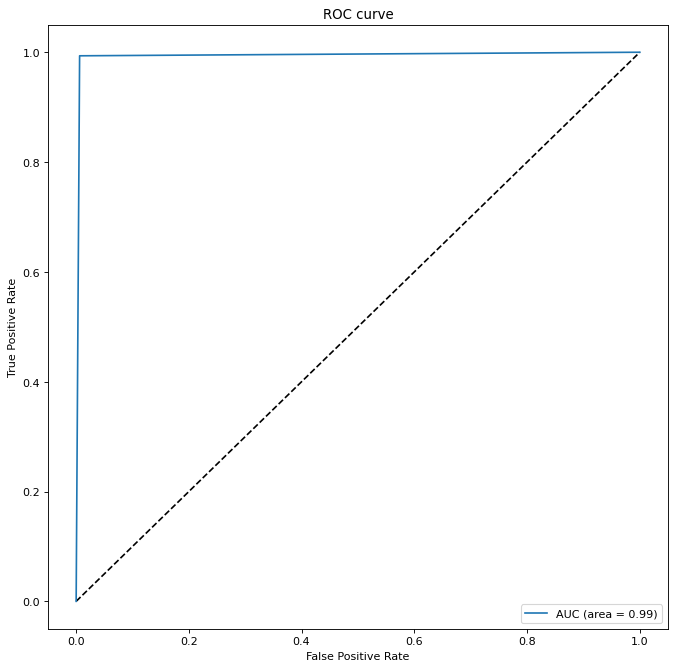

####################################################################################################
####################################################################################################

Model name: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

####################
TRAINING REPORT
####################
[18:26:24] WARNING: C:/Users/Administrat

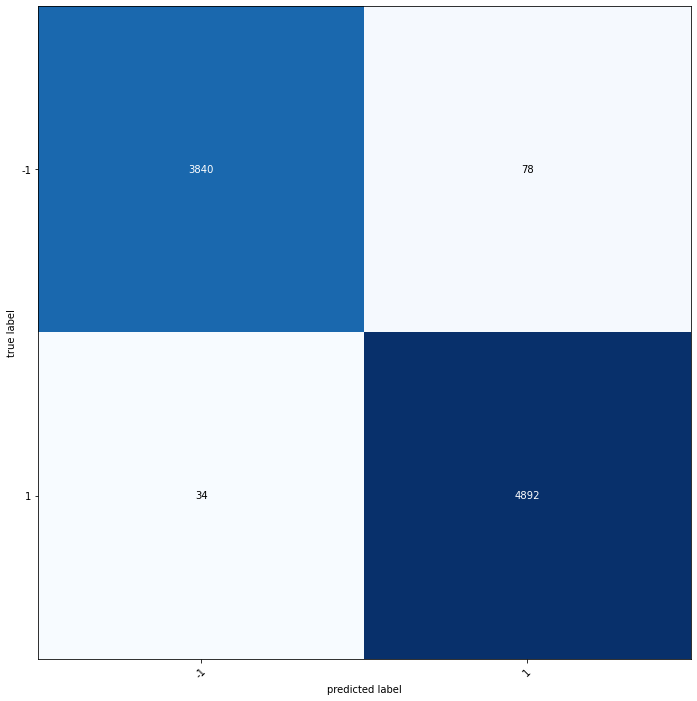

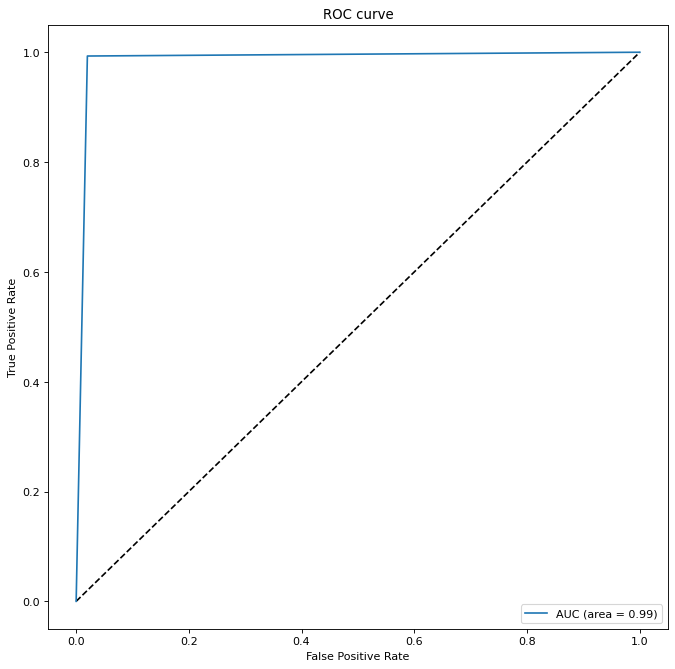

####################
TESTING REPORT
####################
[18:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1231

    accuracy                           0.99      2211
   macro avg       0.99      0.99      0.99      2211
weighted avg       0.99      0.99      0.99      2211



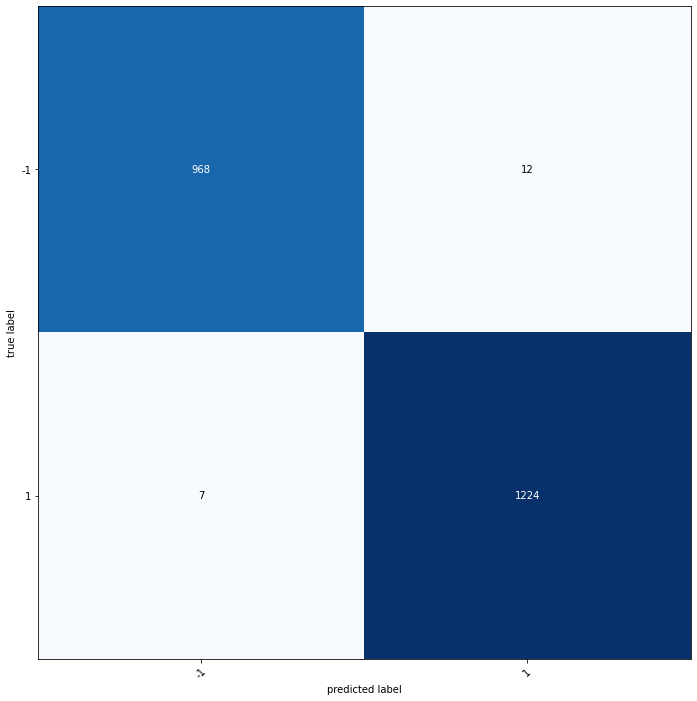

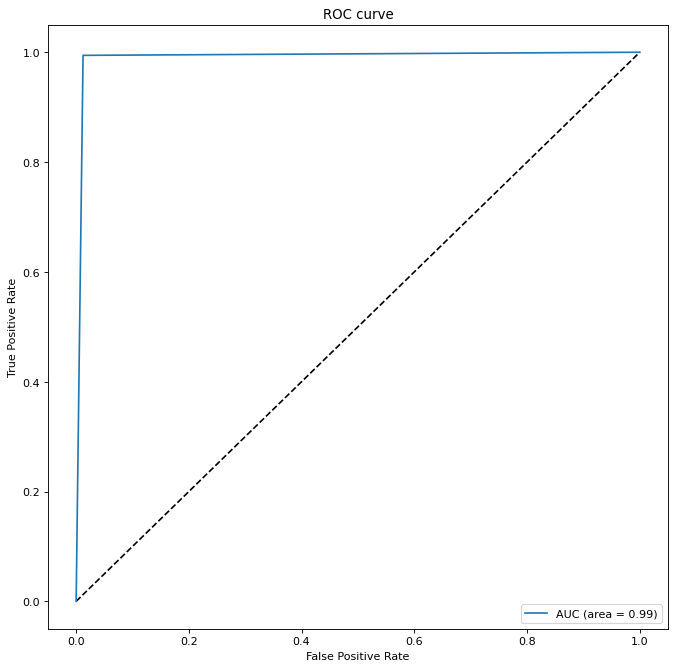

####################################################################################################


In [30]:
# Iterating the models for detailed check
for model_curr in check_models:
    # Print heading
    print("#"*100)
    
    print("\n" + "Model name: " + str(model_curr) + "\n")
    # Defining the model
    model = model_curr
    
    # Print model evaluation report
    print("#"*20)
    print("TRAINING REPORT")
    print("#"*20)
    get_report(x_train, y_train, class_labels, model)
    print("#"*20)
    print("TESTING REPORT")
    print("#"*20)
    get_report(x_test, y_test, class_labels, model)
    print("#"*100)

### INFERENCE
* We have identified Random Forest Classifier as the best performing model.

In [31]:
# Importing libraries for hyper-parameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint

In [32]:
# Defining random forest model
rf = RandomForestClassifier(random_state = 10)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}


In [33]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Print the parameter grid
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 10)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train, y_train)

# Getting the best parameter estimates
rf_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'n_estimators': 311,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False}

In [35]:
# Base mdel for grid search
rf = RandomForestClassifier(random_state = 10)

# Generate search grid
n_estimators = np.array(range(100, 524, 10))

# Search parameters
random_grid = {'n_estimators': n_estimators}

# Setting search object
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = random_grid, 
                           scoring='f1_weighted',
                           n_jobs=-1,
                           cv=10)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

Best: 0.971023 using {'n_estimators': 230}


In [36]:
# Base mdel for grid search
rf = RandomForestClassifier(random_state = 10)

# Generate search grid
n_estimators = np.array(range(220, 241))

# Search parameters
random_grid = {'n_estimators': n_estimators}

# Setting search object
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = random_grid, 
                           scoring='f1_weighted',
                           n_jobs=-1,
                           cv=10)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

Best: 0.971136 using {'n_estimators': 236}


In [37]:
# Base mdel for grid search
rf = RandomForestClassifier(random_state = 10, n_estimators = 236)

# Generate search grid
max_depth = np.array(range(100, 524, 10))

# Search parameters
random_grid = {'max_depth': max_depth}

# Setting search object
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = random_grid, 
                           scoring='f1_weighted',
                           n_jobs=-1,
                           cv=10)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

Best: 0.971136 using {'max_depth': 100}


In [38]:
# Base mdel for grid search
rf = RandomForestClassifier(random_state = 10, n_estimators = 236)

# Generate search grid
max_depth = np.array(range(10, 110, 10))

# Search parameters
random_grid = {'max_depth': max_depth}

# Setting search object
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = random_grid, 
                           scoring='f1_weighted',
                           n_jobs=-1,
                           cv=10)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

Best: 0.971136 using {'max_depth': 30}


In [39]:
# Base mdel for grid search
rf = RandomForestClassifier(random_state = 10, n_estimators = 236)

# Generate search grid
max_depth = np.array(range(20, 41))

# Search parameters
random_grid = {'max_depth': max_depth}

# Setting search object
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = random_grid, 
                           scoring='f1_weighted',
                           n_jobs=-1,
                           cv=10)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

Best: 0.971136 using {'max_depth': 27}


In [40]:
# Base mdel for grid search
rf = RandomForestClassifier(random_state = 10,
                            n_estimators = 236,
                            max_depth = 27,
                            min_samples_leaf = 1,
                            max_features = 'auto',
                            bootstrap = False)

# Generate search grid
min_samples_split = np.array(range(1, 11))

# Search parameters
random_grid = {'min_samples_split': min_samples_split}

# Setting search object
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = random_grid, 
                           scoring='f1_weighted',
                           n_jobs=-1,
                           cv=10)

# Perform search
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

Best: 0.971711 using {'min_samples_split': 4}


####################
TRAINING REPORT
####################
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3918
           1       0.99      0.99      0.99      4926

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844



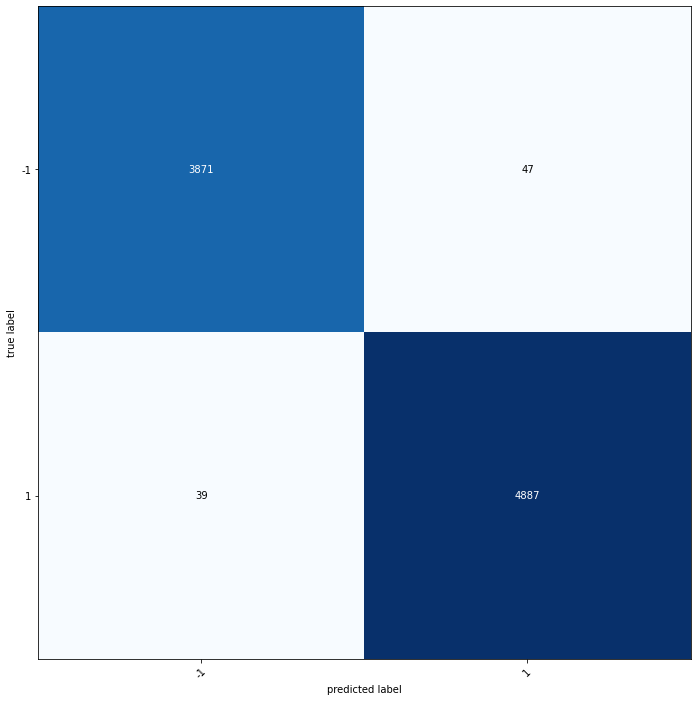

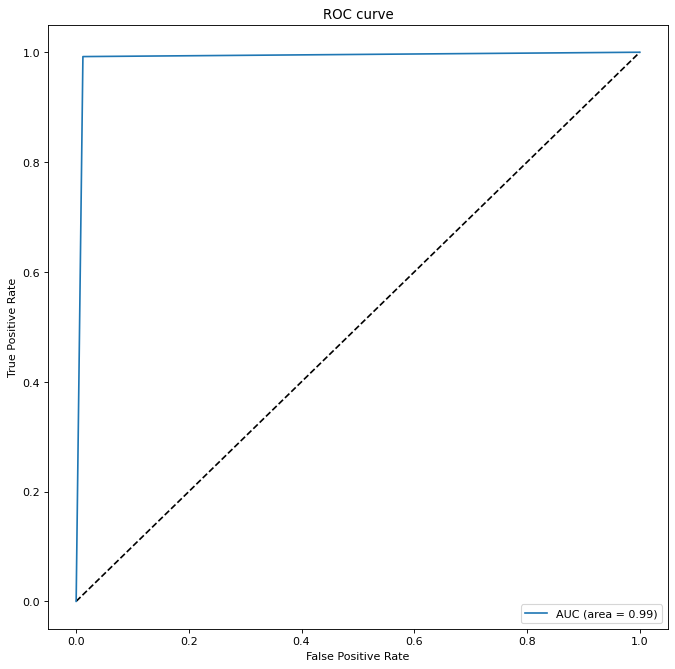

####################
TESTING REPORT
####################
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1231

    accuracy                           0.99      2211
   macro avg       0.99      0.99      0.99      2211
weighted avg       0.99      0.99      0.99      2211



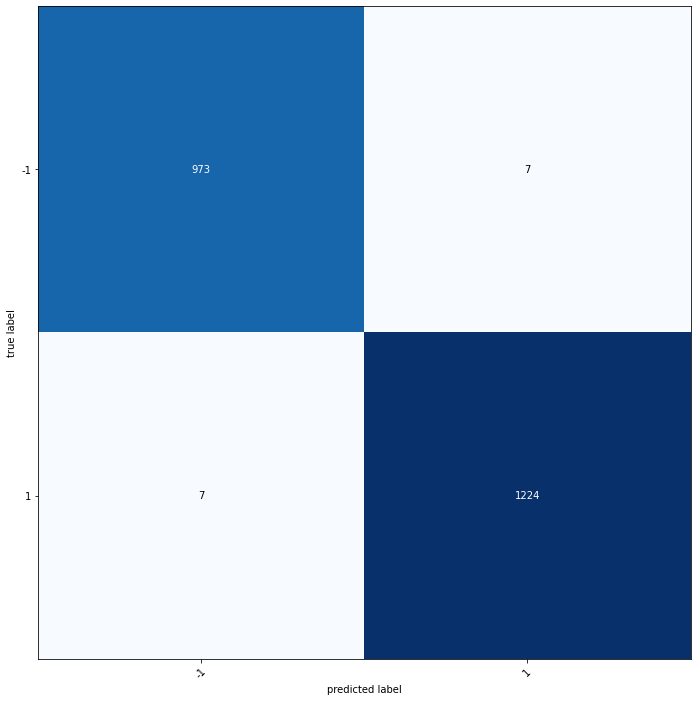

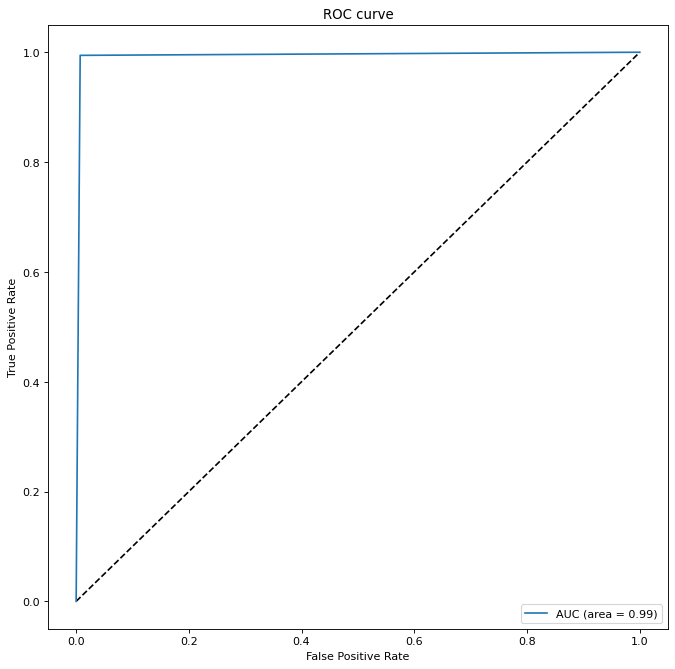

####################################################################################################


In [41]:
# Defining the model
model = RandomForestClassifier(random_state = 10,
                            n_estimators = 236,
                            max_depth = 27,
                            min_samples_leaf = 1,
                            max_features = 'auto',
                            bootstrap = False,
                            min_samples_split = 4)
    
# Print model evaluation report
print("#"*20)
print("TRAINING REPORT")
print("#"*20)
get_report(x_train, y_train, class_labels, model)
print("#"*20)
print("TESTING REPORT")
print("#"*20)
get_report(x_test, y_test, class_labels, model)
print("#"*100)